# Long Exposure Emulator
This script emulates a long exposure photograph by taking the brightest each pixel becomes in a video and compiling these into a single photograph
To use this script simply set the video file name, input path, output path, video extension and image extension as detailed below

True

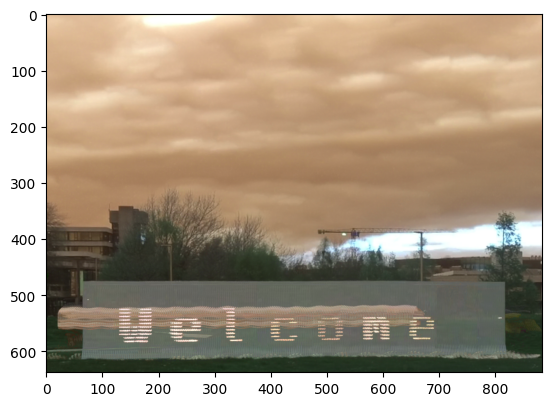

In [2]:
import cv2

file = ''   # Video file name
inpath =''  # Path to input video file
outpath=''  # Path to output image
videoExtention = '.mov' # Input video extension
imageExtention = '.png' # Image extension to output

cap = cv2.VideoCapture(inpath+file+videoExtention)

frames=[]
ret=True
while ret:
    ret, frame = cap.read()
    if ret:
        frames.append(frame)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

import numpy as np

#For each frame, get the brightness of each pixel by combining the RGB values
summed=np.sum(frames,3)

length, width, rgb = np.shape(frames[0])    #Get the length an width of a single frame
created=np.zeros([length,width,rgb])    #Create an empty image of the correct size

index=summed.argmax(axis=0)         # For each pixel, find the frame where that pixel is the brightest

# Combine the brightest each pixel becomes, to create a final image
for i in range(0,length):
    for j in range(0,width):
        ind=index[i,j]
        created[i,j]=frames[ind][i][j]

created=created.astype(int)

import matplotlib.pyplot as plt
plt.imshow(created)
cv2.imwrite(outpath+file+imageExtention,created)